# Question 7: Trapeziod Method (Euler Predictor-Corrector)

The more general form of a first order Ordinary Differential Equation is: $$ y′=f(x,y) $$
 
This can be solved analytically by integrating both sides but this is not straight forward for most problems. Numerical methods can be used to approximate the solution at discrete points.

$$ y' = f(x,y) = \lambda y + \frac{1}{1 + x^{2}} - \lambda arctan(x) $$ 

Initial Condition $ y(0) = 0 $

Boundary $ 0 \le x \le 1 $

Step Size $ h_{1} = 0.1, $ h_{2} = 0.2 $

$$ \lambda _{1} = -1,  \lambda _{2} = -10 $$

Actual Solution $ y(x) = arctan(x) $





In [1]:
## Library
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

## Defining the Function

In [2]:
def myfun_xy(x,y,l):
    return (l*y + 1/(1 + x**2) -l*math.atan(x))


## Discrete Interval 
Here we will use two different steps sizes on the  $ 0 \leq x \leq 1 $.
### Interval
The step Size will be $h_{1} = 0.1, h_{2} = 0.2$

with the discrete time steps,
$$ x_{i} = 0 + i0.1 $$
for  $i=0,1,...,10$.

$$ x_{i} = 0 + i0.2 $$
for  $i=0,1,...,5$.

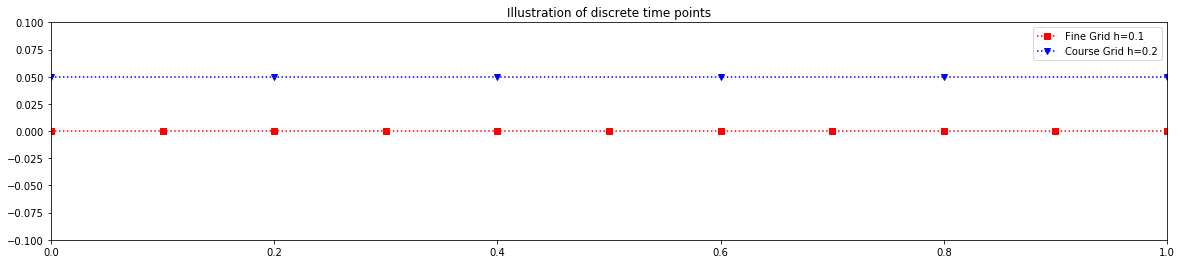

In [3]:
# Start and end of interval
b=1
a=0
# Steps N1=400
N1=10
N2=5
h1=0.1
h2=0.2


x1=np.arange(a,b+h1,h1)
x2=np.arange(a,b+h2,h2)

fig = plt.figure(figsize=(20,4))
plt.plot(x1,0*x1,'s:',color='red',label='Fine Grid h=%s'%(h1))
plt.plot(x2,0*x2+.05,'v:',color='blue',label='Course Grid h=%s'%(h2))

plt.xlim((0,1))
plt.ylim((-0.1,0.1))
plt.title('Illustration of discrete time points')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Analytic (Exact) solution')

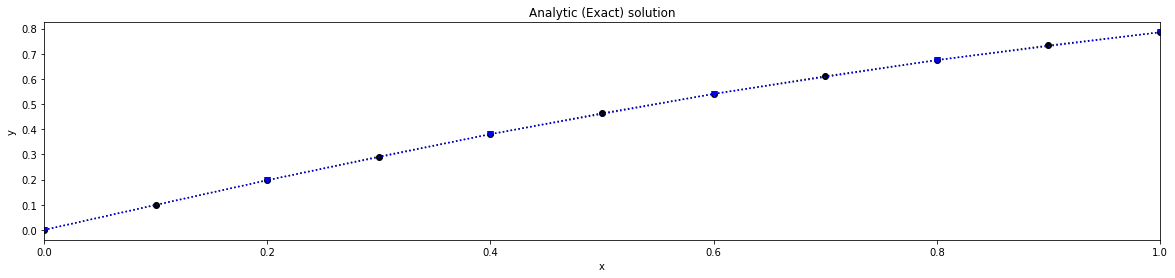

In [6]:
## Analytic Solution y
y1= np.arctan(x1)
y2= np.arctan(x2)

fig = plt.figure(figsize=(20,4))
plt.plot(x1,y1,'o:',color='black')
plt.plot(x2,y2,'v:',color='blue')
plt.xlim((0,1))
plt.xlabel('x')
plt.ylabel('y')

plt.title('Analytic (Exact) solution')

## Setting up the inital Conditions
$$ w_{0} = 0 $$

In [7]:
IC=0 # Intial condtion
w1 = np.zeros(N1+1)
z1 = np.zeros(N1+1)
w2 = np.zeros(N1+1)
z2 = np.zeros(N1+1)

w1[0]=IC
z1[0]=IC
w2[0]=IC
z2[0]=IC

w3 = np.zeros(N2+1)
z3 = np.zeros(N2+1)
w4 = np.zeros(N2+1)
z4 = np.zeros(N2+1)

w3[0]=IC
z3[0]=IC
w4[0]=IC
z4[0]=IC


## Trapezoid Method
Assuming uniform stepsize  $x_{i+1} − x_{i}$ is replaced by  h, re-arranging the equation gives:
$$ w_{i+1} = w_{i} + \frac{h}{2}(f(x_{i},w_{i}) + f(x_{i+1},z_{i+1}) ) $$

$$ z_{i+1} = w_{i} + hf(x_{i}, w_{i}) $$





Text(0.5, 1.0, 'Analytic and Trapeziod Method solution')

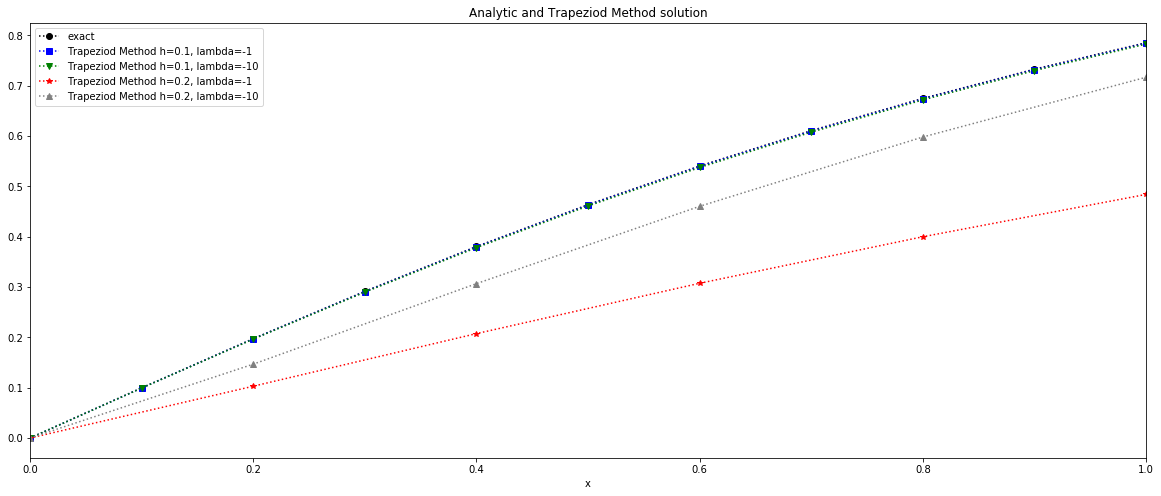

In [27]:

for i in range (0,N1):
    z1[i]=w1[i]+h1*myfun_xy(x1[i], w1[i], -1)
    w1[i+1]=w1[i]+h1/2*(myfun_xy(x1[i], w1[i], -1) + myfun_xy(x1[i+1], z1[i], -1))
    z2[i]=w2[i]+h1*myfun_xy(x1[i], w2[i], -10)
    w2[i+1]=w2[i]+h1/2*(myfun_xy(x1[i], w2[i], -10) + myfun_xy(x1[i+1], z2[i], -10))
    
for i in range (0,N2):
    z3[i]=w3[i]+h1*myfun_xy(x2[i], w3[i], -1)
    w3[i+1]=w3[i]+h1/2*(myfun_xy(x2[i], w3[i], -1) + myfun_xy(x2[i+1], z3[i], -1))
    z4[i]=w4[i]+h1*myfun_xy(x2[i], w4[i], -10)
    w4[i+1]=w4[i]+h1/2*(myfun_xy(x2[i], w4[i], -10) + myfun_xy(x2[i+1], z4[i], -10))
    

fig = plt.figure(figsize=(20,8))
plt.plot(x1,y1,'o:',color='black',label='exact')
plt.plot(x1,w1,'s:',color='blue',label='Trapeziod Method h=0.1, lambda=-1')
plt.plot(x1,w2,'v:',color='green',label='Trapeziod Method h=0.1, lambda=-10')

plt.plot(x2,w3,'*:',color='red',label='Trapeziod Method h=0.2, lambda=-1')
plt.plot(x2,w4,'^:',color='grey',label='Trapeziod Method h=0.2, lambda=-10')

plt.xlim((0,1))
plt.xlabel('x')
plt.legend(loc='best')
plt.title('Analytic and Trapeziod Method solution')

In [17]:
table = ListTable()
table.append(['x', 'w1 TM h=0.1 l=-1', 'w2 TM h=0.1 l=-10','Exact',
              'w1 TM Err 0.1', 'w2 TM Err 0.1', '% Err w1 TM 0.1', '% Err w2 TM 0.1'])
tableSize = 10
for i in range (0,tableSize+1):
    table.append([round(x1[i],5), round(w1[i],5), round(w2[i],5), round(y1[i],5),
                  round(abs(y1[i]-w1[i]),8), round(abs(y1[i]-w2[i]),8),
                 round(abs(y1[i]-w1[i])/abs(y1[i])*100,5), round(abs(y1[i]-w2[i])/abs(y1[i])*100,5)])
    
table.append(['Max',' ' ,' ' ,' '
              , round(max(abs(y1-w1)),5), round(max(abs(y1-w2)),5)])
table

x,w1 TM h=0.1 l=-1,w2 TM h=0.1 l=-10,Exact,w1 TM Err 0.1,w2 TM Err 0.1,% Err w1 TM 0.1,% Err w2 TM 0.1
0.0,0.0,0.0,0.0,0.0,0.0,nan,nan
0.1,0.09949,0.09934,0.09967,0.00018027,0.00032938,0.18087,0.33047
0.2,0.19702,0.19644,0.1974,0.00037233,0.00095122,0.18862,0.48188
0.3,0.2909,0.28982,0.29146,0.00055434,0.00163467,0.1902,0.56086
0.4,0.3798,0.37827,0.38051,0.00071093,0.00223868,0.18684,0.58834
0.5,0.46281,0.46096,0.46365,0.00083446,0.00268995,0.17998,0.58017
0.6,0.5395,0.53745,0.54042,0.00092377,0.00296622,0.17094,0.54887
0.7,0.60974,0.60765,0.61073,0.00098187,0.00307929,0.16077,0.5042
0.8,0.67373,0.67168,0.67474,0.00101368,0.00305933,0.15023,0.45341
0.9,0.73179,0.72987,0.73282,0.0010245,0.00294244,0.1398,0.40152


In [20]:
table2 = ListTable()
table2.append(['x', 'w3 TM h=0.2 l=-1', 'w4 TM h=0.2 l=-10','Exact',
              'w3 TM Err 0.2', 'w4 TM Err 0.2', '% Err w3 TM 0.2', '% Err w4 TM 0.2'])
tableSize2 = 5
for i in range (0,tableSize2+1):
    table2.append([round(x2[i],5), round(w3[i],5), round(w4[i],5), round(y2[i],5),
                  round(abs(y2[i]-w3[i]),8), round(abs(y2[i]-w4[i]),8),
                 round(abs(y2[i]-w3[i])/abs(y2[i])*100,5), round(abs(y2[i]-w4[i])/abs(y2[i])*100,5)])
    
table2.append(['Max',' ' ,' ' ,' '
              , round(max(abs(y2-w3)),5), round(max(abs(y2-w4)),5)])
table2

[['x',
  'w3 TM h=0.2 l=-1',
  'w4 TM h=0.2 l=-10',
  'Exact',
  'w3 TM Err 0.2',
  'w4 TM Err 0.2',
  '% Err w3 TM 0.2',
  '% Err w4 TM 0.2'],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, nan],
 [0.2, 0.10295, 0.14677, 0.1974, 0.09444886, 0.05062086, 47.84751, 25.64437],
 [0.4, 0.20745, 0.30674, 0.38051, 0.17305881, 0.07376239, 45.48119, 19.38532],
 [0.6, 0.30744, 0.46035, 0.54042, 0.23297788, 0.08007305, 43.11056, 14.81683],
 [0.8, 0.39987, 0.59803, 0.67474, 0.27487432, 0.07670944, 40.73776, 11.36872],
 [1.0, 0.48395, 0.71671, 0.7854, 0.30144659, 0.06868333, 38.38137, 8.74503],
 ['Max', ' ', ' ', ' ', 0.30145, 0.08007]]